# **Using ML to Predict Election Outcomes in the United States From OpenSecrets Data**

**CS6364 Final Project Fall 2022**

* Collins Munyendo 
* Matthew Key
* Paul Gimeno 





# Section 1: Preliminary

---

### **Motivation**

Elections in the US are held about every two years, allowing Americans to elect leaders to represent them across many levels of government, from the national level all the way to counties. Because of the high stakes that these elections often present, most candidates raise and spend tons of money through fundraisers. In this project, we are interested in investigating whether factors such as incumbency, money raised, the source of these funds, demographic factors of the donors etc affect the election outcome.


### **Problem Statement**

Whether raising and spending a lot of money directly translates to election victory in the US elections remains an open question. Does this also vary depending on factors such as the size of donors, the state etc? 


### **Hypothesis and Assumptions** ###

- The odds of winning a seat is significantly enhanced by monetary contributions received within an election cycle

- There are other factors that also enhance a candidate’s likelihood of winning an election cycle.


### **Existing methods**
To predict presidential elections, other researchers have performed accurate predictions based on multiple factors. Alan Lichtman, professor of history at American University, has accurately predicted presidential elections since 1982  [3]. He based these predictions on soft factors such as if the incumbent party holds more seats in the US House of Representatives. Using this rubric, Lichtman was even able to predict the 2016 election in the midst of uncertainty surrounding the outcome at the time. 
 
Researchers have also attempted to predict election outcomes using social media data. By performing a content-analysis of over 100,000 tweets, Tumasjan et al. [4] showed that Twitter is used extensively for political deliberation and can thus be used to predict election outcomes. A subsequent study by Jaidka et al. [5] affirmed this to be true in India and Pakistan, but not in Malaysia. To be effective, the study recommends considering the recency of tweets when predicting real outcomes. Gayo-Avello [6] has however cautioned the exaggeration of previous approaches, citing that most of them seem more interested in claiming positive results than providing sound and reproducible methods. This has also been supported by Panagiotis et al. [7] who found electoral predictions using published research methods on Twitter data not to be better than predictions by chance.
 
Beyond social media, other researchers have attempted to predict election outcomes from politicians' faces. To test whether candidates that look more competent receive more votes than other candidates using the 2008 United States presidential election data, Armstrong et al. [8]  found that the ratings of facial competence gave useful long-term predictions of the popular vote winners in the presidential primaries and general election in the United States. The study encourages parties to field competent-looking candidates to increase their chances of winning elections.
 
Unlike previous approaches, we are the first, to our knowledge, to leverage machine learning to explore how election outcomes in the United States are correlated with various factors, for example incumbency (or lack thereof), the amount raised or spent through donations, the demographics of the donors etc. We use the publicly available campaign data on OpenSecrets [1] to study these factors, finding that incumbency is the factor that is most correlated with winning elections, even more so than the amount of money raised or spent by the candidate.


### **Our Initial Approach**



For our prelimary analysis post data pre-processing, we perform a simple analysis among different features including amount of money raised, party affiliation, demographics of donors, incumbency etc and the target i.e. election outcome. Afterwards, we use the features that are most correlated with the election outcome to perform a logistic regression, using 80% of the data for training and 20% for testing.

Prelimary work can be viewed in the notebook below:

https://github.com/gimenopea/CSCI6364/blob/752abb14842debbd009a531d138baede370736ad/FinalProject/scripts/analysis.ipynb 

We noted the following observations:

1. That we have an imbalanced class distribution in this subset of our dataset (senate seats only) as shown below.

2. This imbalanced is observed across all features.

3. We identified a baseline metric to use which is a zero rate classification since our majority label are negatives. 

### **Novelty of Approach**

Based on our preliminary research, the proposed approach of leveraging ML tasks in analyzing individual contribution data in predicting election seat outcomes can be considered novel. To the best of our knowledge, there does not seem to be many academic literature that predicts election outcomes based on individual contribution activity across multiple cycles across federal levels.



# Section 2: Experiment

---


### **Dataset**

In this project, we shall use the historical fundraising data available on [Open Secrets](https://www.opensecrets.org/) to investigate whether there is a correlation between the amount of money raised and election victory in the US. We shall additionally investigate whether this varies with the state, the position being vied for, the associated party, year etc. The key challenge will be aggregating and labeling the data i.e. indicating candidates that won or did not win. This will require a lot of pre-processing work and feature engineering and our results will likely provide useful insights for potential candidates on the factors they need to consider the most to win electoral seats in US elections.

The dataset itself span the 2010 US election cycle all the way up to the 2018 election cycle. The raw dataset was acquired through the bulk dataset offering at http://opensecrets.org and the team was able to engineer a process to process through 9GB worth of raw text data. The data includes a curated data dictionary that describes financial and spending data.  We downloaded these data in bulk from OpenSecrets.org [2]. The Individual sample rows are large and require an account on OpenSecrets to gain access. The Candidate sample rows can be viewed here: https://github.com/gimenopea/CSCI6364/tree/main/FinalProject/data/candidates

File statistics: 
- candidate raw text files: 20 mb across 40k candidates
- individual contributions files: 9.32GB 
- preprocessing stats:

<table style="text-align: center;">
<tr>
  <td>
   <img src="https://github.com/gimenopea/CSCI6364/blob/main/FinalProject/final_submission_images/preprocessing-stats.PNG?raw=true"/>
  </td>
</tr>
</table>

The pre-processing steps can be viewed through these notebooks:

1. https://github.com/gimenopea/CSCI6364/blob/main/FinalProject/scripts/flatten.ipynb
2. preprocess-2.ipynb


**Data pre-processing and feature engineering**

- We have performed initial analysis using logistic regression, and the code, visualizations and comments are available as part of the Jupyter Notebook file. A few considerations were made in terms of engineering large blobs of text files for the pre-processing step:

- For single machines with limited memory, an approach to process texts in chunks was first explored which is aggregated sequentially down to the final grain of cycle_year, donor_id and candidate_id.

- The team reviewed OpenSecrets’ data dictionary as part of the pre-processing step. The data dictionary for our candidate seed file can viewed here: 
https://www.opensecrets.org/resources/datadictionary/Data%20Dictionary%20Candidates%20Data.htm and the individual contributions data can be viewed here:
https://www.opensecrets.org/resources/datadictionary/Data%20Dictionary%20for%20Individual%20Contribution%20Data.htm

- Since the contributions on Open Secrets are from individual donors, we aggregated the data ordered by candidates, summing together their total contributions, and converting fields such as demographics of their donors, incumbency and challenger status to binary. 

- Since the OpenSecrets data did not include candidate victory, we  additionally labeled the data, indicating whether each candidate had won or not won an election. 
- Furthermore, since campaign funding is relative to a candidates competition, the amount of funds were ranked relative to their competitors. 






### **Experimental Setup**

[In our final evaluation setup](https://github.com/matthewlkey/csci6364/blob/dev-paulg/algo-runner.ipynb), it is constucted such that:





> There are 5 algorithms applied in our dataset:
> 1. Tuned logistic regression
> 2. Principal Component Analysis and Logistic Regression
> 3. Random Forest Classifier
> 4. Ensemble Gradient Boosting Classifier with tuned parameters
> 5. Stacking Algorithm with a logistic regression meta model (final classifier)

These 5 algorithms are applied in 4 areas so that we can predict election winner outcomes in:

> 1. Senate Seats
> 2. House Seats
> 3. Presidential Sets
> 4. All Seats (Senate, House, Presidential)

Algorithms 1 - 4 will produce 16 .pkl model files as shown below.


|Model #|Model Filename|Model Description
|--|--|--
|1|senate-tuned-lr|logistic regression on senate candidates with tuned hyperparameters
|2|house-tuned-lr|logistic regression on house candidates with tuned hyperparameters
|3|pres-tuned-lr|logistic regression on presidential candidates with tuned hyperparameters
|4|all-tuned-lr|logistic regression on all candidates with tuned hyperparameters
|5|senate-pca-lr|pca + logistic regression on senate candidates
|6|house-pca-lr|pca + logistic regression on house candidates
|7|pres-pca-lr|pca + logistic regression on presidential candidates
|8|all-pca-lr|pca + logistic regression on all candidates
|9|senate-rf|random forest classificer on senate candidates
|10|house-rf|random forest classificer on senate candidates
|11|pres-rf|random forest classificer on senate candidates
|12|all-rf|random forest classificer on senate candidates
|13|senate-gb|gradient boosting algo on senate candidates
|14|house-gb|gradient boosting algo on senate candidates
|15|pres-gb|gradient boosting algo on senate candidates
|16|all-gb|gradient boosting algo on senate candidates


Algorithm 5 will produce 1 Stacking Algorithm model using the 16 .pkl models and produce 4 .pkl model files for a total of 20 .pkl model files.

All algorithms will use cross validation (k=5) to determine the best parameters for each model.

All algorithms will use a holdout test set to determine the accuracy and f1 score. We will base our final model selection highest accuracy and f1 score.

The set of algorithms will be repeated for primary candidates only which aims to address class imbalances and it gives us the opportunity to use a different baseline model to gauge the predictive power of our newly added features.

The baseline used in this step is derived from: https://github.com/gimenopea/CSCI6364/blob/main/FinalProject/algo-runner-currentcand-baseline.ipynb

while the final evaluation run can be found here: https://github.com/gimenopea/CSCI6364/blob/main/FinalProject/algo-runner-currentcand-experiment.ipynb

All in all, there are a total of 20 .pkl model files that will be used to predict election winners using all candidates that ever ran and an additional 20 .pkl model files that will be used to predict election winners using only primary candidates. This gives us a total of 40 models overall.

**Comparison to baseline**

At the end of this notebook, we will compare our model to a classifier that only predicts on the majority class. This will be our baseline metric. We will prove that our model is better than the baseline model by showing that our model has a higher accuracy than the baseline model


### **Data Analysis**


We performed various ML tasks  through individual notebooks indicated below:

1. [Preliminary logistic regression analysis](https://github.com/gimenopea/CSCI6364/blob/main/FinalProject/scripts/analysis.ipynb)

 We perform simple logistic regression for senate seats in an election cycle
 
2. [Tuned Logistic Regression for all candidate types that spans multiple years](https://github.com/gimenopea/CSCI6364/blob/main/FinalProject/logreg_all_candidate_types.ipynb)

 We expanded our featureset to include dummy variables for state seats as well as party affiliation. In addition, we expanded our experiments to understand the predictive power of our features when observing outcomes in the house, senate and presidential elections. 

3. [Running out existing feature set to an ensemble of algorithms](https://github.com/gimenopea/CSCI6364/blob/main/FinalProject/algo-runner.ipynb): 

 We analyze model performance in house, senate, presidential and all seats using
Logistic Regression, PCA + Logistic Regression, Random Forest, Gradient Boosting and Stacking algorithms.


# Section 3: Experimental Results

--- 

### **1. Results from 1st Data Analysis - Untuned Logistic Regression** ###

Source notebook: https://github.com/gimenopea/CSCI6364/blob/main/FinalProject/scripts/analysis.ipynb

**Results from initial logistic regression analysis (Senate Seats)**
<table align='center'>
<tr>
<img src='https://github.com/gimenopea/CSCI6364/blob/main/FinalProject/final_submission_images/section-3-initial-analysis-findings-metrics.PNG?raw=true' > 
</tr>
</table> 


### **2. Results from 2nd Data Analysis - Tuned Logistic Regression** ###
Source notebook: https://github.com/gimenopea/CSCI6364/blob/main/FinalProject/logreg_all_candidate_types.ipynb

**Results from Senate seats**

<img src='https://github.com/gimenopea/CSCI6364/blob/main/FinalProject/final_submission_images/section3-senate-seats.PNG?raw=true'>

**Results from House seats**

<img src='https://github.com/gimenopea/CSCI6364/blob/main/FinalProject/final_submission_images/section3-house-seats.PNG?raw=true'>

**Results from Presidential seats**

<img src='https://github.com/gimenopea/CSCI6364/blob/main/FinalProject/final_submission_images/section3-presidential-seats.PNG?raw=true'>


**Results from All seats**

<img src='https://github.com/gimenopea/CSCI6364/blob/main/FinalProject/final_submission_images/section3-house-seats.PNG?raw=true'>

### **3. Results from 3rd Data Analysis - Ensemble of Algorithms for all candidates that ever ran** ###

source notebook: https://github.com/gimenopea/CSCI6364/blob/main/FinalProject/algo-runner.ipynb

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)
metrics = pd.read_csv('models/metrics.csv')

df = pd.read_csv('data/all_features_candidate_summary_with_labels.csv')
df_senate = df[df['senate_seat'] == 1].copy()
df_presidential = df[df['presidential_seat'] == 1].copy()
df_house = df[df['house_seat'] == 1].copy()


metrics['segment'] = metrics['experiment_name'].apply(lambda x: 'senate' if 'senate' in x else 'house' if 'house' in x else 'presidential' if 'presidential' in x else 'all')

**highest performing model in each segment based on test accuracy**

In [3]:
metrics.sort_values(by='test_accuracy', ascending=False).groupby('segment').head(1)

,experiment_name,model_name,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1,hyperparameters,segment
17,Stacking house seats,models/house-stacking.pkl,0.980745,0.963354,0.965842,0.938144,0.961313,0.912281,0.963572,0.925032,"{'final_estimator__C': 1, 'final_estimator__penalty': 'l2', 'final_estimator__solver': 'saga'}",house
15,Gradient-Boosting all seats,models/all-gbc.pkl,0.999870,0.952579,1.000000,0.884848,0.999475,0.927966,0.999737,0.905895,"{'criterion': 'mse', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 200}",all
14,Gradient-Boosting presidential seats,models/presidential-gbc.pkl,1.000000,0.942529,1.000000,0.857143,1.000000,0.900000,1.000000,0.878049,"{'criterion': 'mse', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200}",presidential
16,Stacking senate seats,models/senate-stacking.pkl,0.973684,0.938865,0.931818,0.828571,0.891304,0.783784,0.911111,0.805556,"{'final_estimator__C': 10, 'final_estimator__penalty': 'l2', 'final_estimator__solver': 'lbfgs'}",senate


**highest performing model in each segment based on f1 score**

In [4]:
metrics.sort_values(by='test_f1', ascending=False).groupby('segment').head(1)

,experiment_name,model_name,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1,hyperparameters,segment
17,Stacking house seats,models/house-stacking.pkl,0.980745,0.963354,0.965842,0.938144,0.961313,0.912281,0.963572,0.925032,"{'final_estimator__C': 1, 'final_estimator__penalty': 'l2', 'final_estimator__solver': 'saga'}",house
15,Gradient-Boosting all seats,models/all-gbc.pkl,0.999870,0.952579,1.000000,0.884848,0.999475,0.927966,0.999737,0.905895,"{'criterion': 'mse', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 200}",all
14,Gradient-Boosting presidential seats,models/presidential-gbc.pkl,1.000000,0.942529,1.000000,0.857143,1.000000,0.900000,1.000000,0.878049,"{'criterion': 'mse', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200}",presidential
16,Stacking senate seats,models/senate-stacking.pkl,0.973684,0.938865,0.931818,0.828571,0.891304,0.783784,0.911111,0.805556,"{'final_estimator__C': 10, 'final_estimator__penalty': 'l2', 'final_estimator__solver': 'lbfgs'}",senate


**Evaluation of best models to baseline**

We use a simple class majority classifier as our baseline model. We will compare our best performing model to the baseline model to determine if our model is better than the baseline model.

**class imbalances across segments**

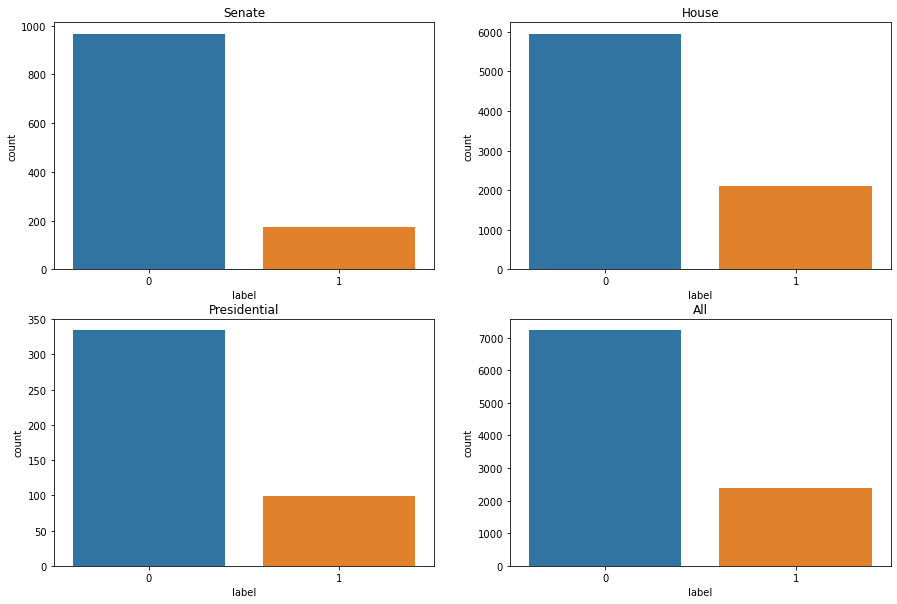

In [5]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
sns.countplot(df_senate['label'], ax=ax[0,0])
sns.countplot(df_house['label'], ax=ax[0,1])
sns.countplot(df_presidential['label'], ax=ax[1,0])
sns.countplot(df['label'], ax=ax[1,1])
ax[0,0].set_title('Senate')
ax[0,1].set_title('House')
ax[1,0].set_title('Presidential')
ax[1,1].set_title('All')
plt.show()

In [6]:
#save all precentage of label 0 and label 1 in each segment
senate_0 = df_senate[df_senate['label']==0].shape[0]/df_senate.shape[0]
senate_1 = df_senate[df_senate['label']==1].shape[0]/df_senate.shape[0]
house_0 = df_house[df_house['label']==0].shape[0]/df_house.shape[0]
house_1 = df_house[df_house['label']==1].shape[0]/df_house.shape[0]
presidential_0 = df_presidential[df_presidential['label']==0].shape[0]/df_presidential.shape[0]
presidential_1 = df_presidential[df_presidential['label']==1].shape[0]/df_presidential.shape[0]
all_0 = df[df['label']==0].shape[0]/df.shape[0]
all_1 = df[df['label']==1].shape[0]/df.shape[0]

#save all 0 classes to dictionary
dict_0 = {'senate': senate_0, 'house': house_0, 'presidential': presidential_0, 'all': all_0}

print(f'baselines: {dict_0}')


baselines: {'senate': 0.8466257668711656, 'house': 0.7385093167701864, 'presidential': 0.7713625866050808, 'all': 0.7523978315262719}


In [7]:
### Comparing our best models to a zero-rate classifier (baseline)
best_models_accuracy = metrics.sort_values(by='test_accuracy', ascending=False).groupby('segment').head(1)
best_models_accuracy['baseline'] = best_models_accuracy['segment'].map(dict_0)

#calculate test accuracy improvement over baseline
best_models_accuracy['test_acc_impr'] = best_models_accuracy['test_accuracy'] - best_models_accuracy['baseline']
best_models_accuracy['test_acc_impr_pct'] = best_models_accuracy['test_acc_impr']/best_models_accuracy['baseline']
best_models_accuracy['test_acc_impr_pct'] = best_models_accuracy['test_acc_impr']*100
best_models_accuracy['test_acc_impr_pct'] = best_models_accuracy['test_acc_impr_pct'].apply(lambda x: round(x, 2))
best_models_accuracy['test_acc_impr_pct'] = best_models_accuracy['test_acc_impr_pct'].apply(lambda x: str(x)+'%')


best_models_accuracy = best_models_accuracy[['experiment_name', 'model_name', 'segment', 'baseline', 'test_acc_impr', 'test_acc_impr_pct', 'test_accuracy', 'test_f1', 'test_precision', 'test_recall', 'train_accuracy', 'train_f1', 'train_precision', 'train_recall']]
best_models_accuracy.reset_index(drop=True, inplace=True)
best_models_accuracy


,experiment_name,model_name,segment,baseline,test_acc_impr,test_acc_impr_pct,test_accuracy,test_f1,test_precision,test_recall,train_accuracy,train_f1,train_precision,train_recall
0,Stacking house seats,models/house-stacking.pkl,house,0.738509,0.224845,22.48%,0.963354,0.925032,0.938144,0.912281,0.980745,0.963572,0.965842,0.961313
1,Gradient-Boosting all seats,models/all-gbc.pkl,all,0.752398,0.200182,20.02%,0.952579,0.905895,0.884848,0.927966,0.999870,0.999737,1.000000,0.999475
2,Gradient-Boosting presidential seats,models/presidential-gbc.pkl,presidential,0.771363,0.171166,17.12%,0.942529,0.878049,0.857143,0.900000,1.000000,1.000000,1.000000,1.000000
3,Stacking senate seats,models/senate-stacking.pkl,senate,0.846626,0.092239,9.22%,0.938865,0.805556,0.828571,0.783784,0.973684,0.911111,0.931818,0.891304


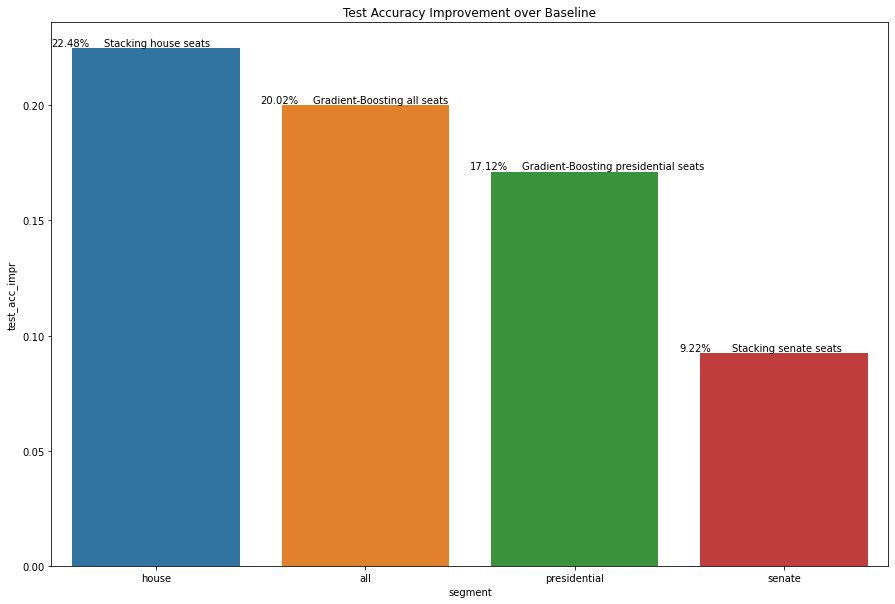

In [8]:
#plot test accuracy improvement over baseline add test_accr_impr to baseline
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x='segment', y='test_acc_impr', data=best_models_accuracy, ax=ax)
ax.set_title('Test Accuracy Improvement over Baseline')

for i, v in enumerate(best_models_accuracy['experiment_name']):
    ax.text(i-.25, best_models_accuracy['test_acc_impr'][i]+.001, v, fontsize=10)

 
for i, v in enumerate(best_models_accuracy['test_acc_impr_pct']):
    ax.text(i-.50, best_models_accuracy['test_acc_impr'][i]+.0010, v, fontsize=10)


plt.show()

### **4. Results from 4th Data Analysis - Ensemble of Algorithms for primary candidates only** ###

In [10]:
metrics = pd.read_csv('models-currentcand/metrics.csv')
metrics_baseline = pd.read_csv('models-currentcand/metrics-baseline.csv')

metrics['segment'] = metrics['experiment_name'].apply(lambda x: 'senate' if 'senate' in x else 'house' if 'house' in x else 'presidential' if 'presidential' in x else 'all')
metrics_baseline['segment'] = metrics_baseline['experiment_name'].apply(lambda x: 'senate' if 'senate' in x else 'house' if 'house' in x else 'presidential' if 'presidential' in x else 'all')

In [11]:
#highest performing model in each segment based on test accuracy
metrics.sort_values(by='test_accuracy', ascending=False).groupby('segment').head(1)

,experiment_name,model_name,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1,hyperparameters,segment
13,Gradient-Boosting house seats,models-currentcand/house-gbc.pkl,1.000000,0.945322,1.000000,0.936170,1.0,0.956522,1.000000,0.946237,"{'criterion': 'mse', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}",house
15,Gradient-Boosting all seats,models-currentcand/all-gbc.pkl,1.000000,0.927235,1.000000,0.904762,1.0,0.947939,1.000000,0.925847,"{'criterion': 'mse', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200}",all
12,Gradient-Boosting senate seats,models-currentcand/senate-gbc.pkl,1.000000,0.919192,1.000000,0.888889,1.0,0.888889,1.000000,0.888889,"{'criterion': 'friedman_mse', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 200}",senate
10,Random-Forest presidential seats,models-currentcand/presidential-rf.pkl,0.994118,0.906977,0.987805,0.850000,1.0,0.944444,0.993865,0.894737,"{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 100}",presidential


In [12]:
#highest performing model in each segment based on f1y
metrics.sort_values(by='test_f1', ascending=False).groupby('segment').head(1)

,experiment_name,model_name,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1,hyperparameters,segment
13,Gradient-Boosting house seats,models-currentcand/house-gbc.pkl,1.000000,0.945322,1.000000,0.936170,1.000000,0.956522,1.000000,0.946237,"{'criterion': 'mse', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}",house
15,Gradient-Boosting all seats,models-currentcand/all-gbc.pkl,1.000000,0.927235,1.000000,0.904762,1.000000,0.947939,1.000000,0.925847,"{'criterion': 'mse', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200}",all
6,PCA + LR presidential seats,models-currentcand/presidential-pca-lr.pkl,0.876471,0.906977,0.833333,0.818182,0.925926,1.000000,0.877193,0.900000,"{'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2', 'pca__n_components': 6}",presidential
12,Gradient-Boosting senate seats,models-currentcand/senate-gbc.pkl,1.000000,0.919192,1.000000,0.888889,1.000000,0.888889,1.000000,0.888889,"{'criterion': 'friedman_mse', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 200}",senate


**Evaluation to baseline**

In [14]:
#get the best model for each segment in metrics
best_models = metrics.sort_values(by='test_accuracy', ascending=False).groupby('segment').head(1)

#get the best model for each segment in metrics_baseline
best_models_baseline = metrics_baseline.sort_values(by='test_accuracy', ascending=False).groupby('segment').head(1)

In [17]:
best_models_baseline

,experiment_name,model_name,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1,hyperparameters,segment
17,Stacking house seats,models-currentcand/house-stacking.pkl,0.799696,0.805589,0.751100,0.744231,0.911032,0.934783,0.823372,0.828694,"{'final_estimator__C': 10, 'final_estimator__penalty': 'none', 'final_estimator__solver': 'lbfgs'}",house
8,Random-Forest senate seats,models-currentcand/senate-rf.pkl,0.829517,0.777778,0.697802,0.705882,0.913669,0.666667,0.791277,0.685714,"{'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 100}",senate
19,Stacking all seats,models-currentcand/all-stacking.pkl,0.806191,0.766112,0.739901,0.686709,0.940283,0.941432,0.828143,0.794145,"{'final_estimator__C': 1, 'final_estimator__penalty': 'l2', 'final_estimator__solver': 'saga'}",all
18,Stacking presidential seats,models-currentcand/presidential-stacking.pkl,0.805882,0.744186,0.722222,0.629630,0.962963,0.944444,0.825397,0.755556,"{'final_estimator__C': 1000, 'final_estimator__penalty': 'l1', 'final_estimator__solver': 'saga'}",presidential


In [16]:
best_models

,experiment_name,model_name,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1,hyperparameters,segment
13,Gradient-Boosting house seats,models-currentcand/house-gbc.pkl,1.000000,0.945322,1.000000,0.936170,1.0,0.956522,1.000000,0.946237,"{'criterion': 'mse', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}",house
15,Gradient-Boosting all seats,models-currentcand/all-gbc.pkl,1.000000,0.927235,1.000000,0.904762,1.0,0.947939,1.000000,0.925847,"{'criterion': 'mse', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200}",all
12,Gradient-Boosting senate seats,models-currentcand/senate-gbc.pkl,1.000000,0.919192,1.000000,0.888889,1.0,0.888889,1.000000,0.888889,"{'criterion': 'friedman_mse', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 200}",senate
10,Random-Forest presidential seats,models-currentcand/presidential-rf.pkl,0.994118,0.906977,0.987805,0.850000,1.0,0.944444,0.993865,0.894737,"{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 100}",presidential


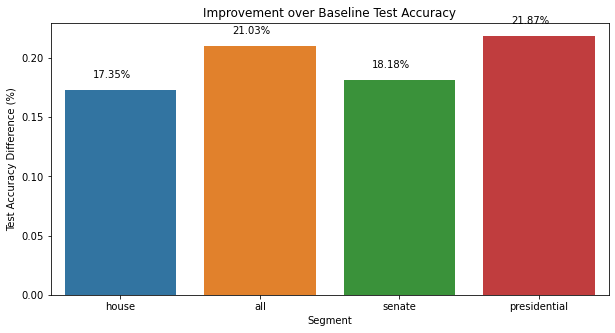

In [18]:
#merge best models and best models baseline 
best_models = best_models.merge(best_models_baseline, on='segment', suffixes=('_stacking', '_baseline'))

best_models['test_accuracy_diff'] = best_models['test_accuracy_stacking'] - best_models['test_accuracy_baseline']


best_models['test_accuracy_diff_pct'] = best_models['test_accuracy_diff'] / best_models['test_accuracy_baseline']

best_models.sort_values(by='test_accuracy_diff_pct', ascending=False)

#plot test_accuracy_diff_pct
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='segment', y='test_accuracy_diff_pct', data=best_models, ax=ax)
ax.set_title('Improvement over Baseline Test Accuracy')
#show values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x()+0.2, p.get_height()+0.01))
ax.set_xlabel('Segment')

ax.set_ylabel('Test Accuracy Difference (%)')
plt.show()


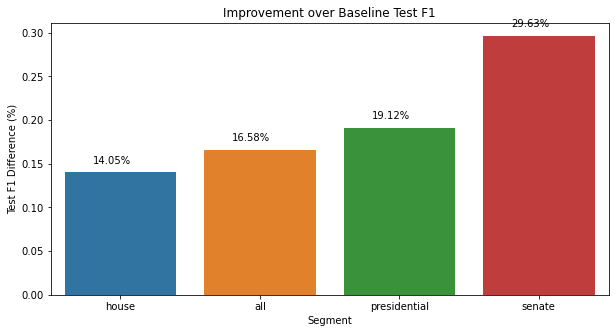

In [19]:
#best model f1
best_models_f1 = metrics.sort_values(by='test_f1', ascending=False).groupby('segment').head(1)

#best model baseline f1
best_models_baseline_f1 = metrics_baseline.sort_values(by='test_f1', ascending=False).groupby('segment').head(1)

best_models_f1 = best_models_f1.merge(best_models_baseline_f1, on='segment', suffixes=('_stacking', '_baseline'))

best_models_f1['test_f1_diff_pct'] = (best_models_f1['test_f1_stacking'] - best_models_f1['test_f1_baseline']) / best_models_f1['test_f1_baseline']

best_models_f1.sort_values(by='test_f1_diff_pct', ascending=False)

#plot test_f1_diff_pct
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='segment', y='test_f1_diff_pct', data=best_models_f1, ax=ax)
ax.set_title('Improvement over Baseline Test F1')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x()+0.2, p.get_height()+0.01))
ax.set_xlabel('Segment')
ax.set_ylabel('Test F1 Difference (%)')
plt.show()


### **Section 5. Future Work and Conclusion** ###

---

**Future Work**

Future work which may dramatically improve the accuracy of our model would be to include additional features such as:
- Analysis of campaign spending and its effect on multi cycle election candidates
- Understanding the effect of campaign spending on the outcome of a single election cycle
- Understand pac contributions and their effect on election outcomes

**Conclusion**

We have successfully built a set of models that predict election outcomes with an accuracy improvement over baseline of 22.48% for house seats, 9.22% for senate seats, 17.22% for presidential seats and 20.22% for all seats using a mixed bag of ensemble algorithms. The features used in making these predictions involve fundraising data provided by individual contributions without any pac contributions and without any campaign spending data and can be obtained freely through OpenSecrets.org. 

**References**


1. https://www.opensecrets.org/resources/datadictionary/Data%20Dictionary%20for%20Individual%20Contribution%20Data.htm
2. https://www.opensecrets.org/bulk-data
3. https://www.thenationalnews.com/world/the-americas/what-is-allan-lichtman-s-prediction-for-the-2024-us-presidential-election-1.1109868
4. Andranik Tumasjan, Timm Sprenger, Philipp Sandner, and Isabell Welpe. Predicting elections with twitter: What 140 characters reveal about political sentiment. In Proceedings of the International AAAI Conference on Web and Social Media, volume 4, pages 178–185, 2010.
5. Kokil Jaidka, Saifuddin Ahmed, Marko Skoric, and Martin Hilbert. Predicting elections from social media: a three-country, three-method comparative study. Asian Journal of Communication, 29(3):252–273, 2019.
6. Daniel Gayo-Avello. No, you cannot predict elections with twitter. IEEE Internet Computing, 16(6):91–94, 2012.
7. Panagiotis T. Metaxas, Eni Mustafaraj, and Dani Gayo-Avello. How (Not) to Predict Elections. In 2011 IEEE Third International Conference on Privacy, Security, Risk and Trust and 2011 IEEE Third International Conference on Social Computing, pages 165–171, 2011.
8. J Scott Armstrong, Kesten C Green, Randall J Jones Jr, and Malcolm J Wright. Predicting elections from politicians’ faces. International Journal of Public Opinion Research, 22(4):511–522, 2010
